#### Previous Stroy

- 지도학습(레이블이 있는 데이터)
    - 분류(Classification)
    - 회귀(Regression)

- 비지도학습(레이블이 없음)
    - 군집
    - 차원 축소

- 회귀모델

    - 1차 함수
    - 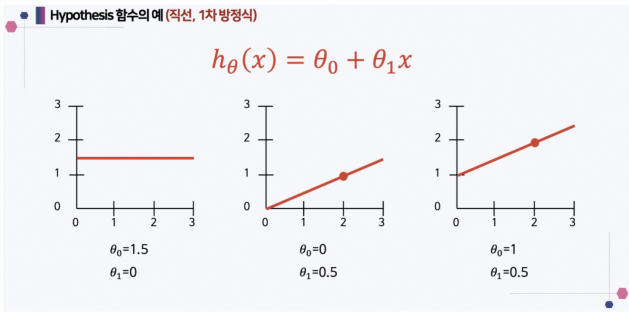

- 선형회귀
    - 입력변수(특징) $x$가 하나인 경우, 선형회귀(Linear Regression)문제는</br>
    주어진 학습데이터와 가장 잘 맞는 Hypothesis함수 $h$를 찾는 문제가 됨
    - 주어진 학습데이터에 대한 정답과 예측값의 차이가 최소가 되는 파라미터 값을 결정

### OLS: Ordinary Linear Least Square

In [2]:
# !pip install statsmodels

In [6]:
import pandas as pd

data = {'x': [1.,2.,3.,4.,5.], 'y': [1.,3.,4.,6.,5.]}
df = pd.DataFrame(data)
df

,x,y
0,1.0,1.0
1,2.0,3.0
2,3.0,4.0
3,4.0,6.0
4,5.0,5.0


In [7]:
import statsmodels.formula.api as smf

lm_model = smf.ols(formula = "y ~ x", data = df).fit()

In [8]:
lm_model.params

Intercept    0.5
x            1.1
dtype: float64

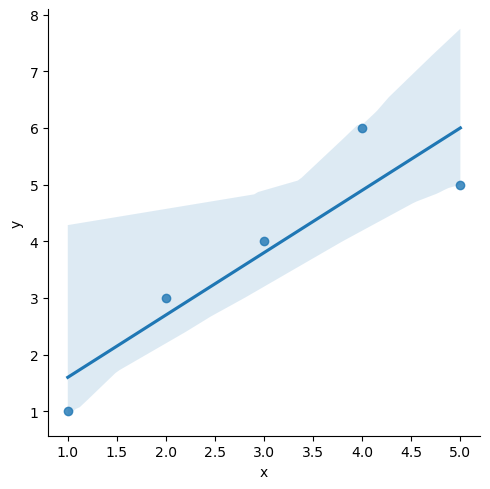

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.lmplot(x='x', y='y', data = df)

- 잔차 평가 residue
    - 잔차는 평균이 0인 정규분포를 따른 것이어야 함
    - 잔차 평가는 잔차의 평균이 0이고 정규분포를 따르는 지 확인

In [10]:
resid = lm_model.resid
resid

0   -0.6
1    0.3
2    0.2
3    1.1
4   -1.0
dtype: float64

- 결정계수 R-Squared
    - y_hat은 예측된 값
    - 예측 값과 실제 값(y)이 일치하면 결정계수는 1이됨(즉 결정계수가 높을 수록 좋은 모델)

    - R-Squared = $\frac{SSR}{SST}$

    - $R^2 = \frac{\sum_{i=1}^{n}{(\hat{y} - \mu)^2}}{\sum_{i=1}^{n}{(y - \mu)^2}}$

In [12]:
# numpy로 직접 결정계수 계산
import numpy as np

mu = np.mean(df.y)
y = df.y
yhat = lm_model.predict()
np.sum((yhat - mu)**2/ np.sum((y-mu)**2))

0.8175675675675678

In [13]:
lm_model.rsquared

0.8175675675675677

C:\Users\qnwje\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


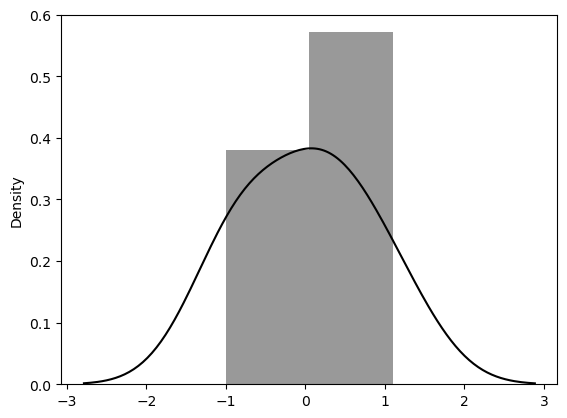

In [17]:
# 잔차의 분포도 확인
sns.distplot(resid, color='black');

# 통계적 회귀

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/ecommerce.csv'
data = pd.read_csv(data_url)
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


- 사용자 세션 길이는 '한 번 접속했을 때 평균 어느정도의 시간을 사용하는지에 대한 데이터'
- Time on App: 폰앱으로 접속했을 때 유지 시간(분)
- Time on Website: 웹사이트로 접속했을 때 유지시간 (분)
- Length of Membership: 회원 자격 유지 기간(연)

In [22]:
data.drop(['Email','Address','Avatar'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avg. Session Length   500 non-null    float64
 1   Time on App           500 non-null    float64
 2   Time on Website       500 non-null    float64
 3   Length of Membership  500 non-null    float64
 4   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


C:\Users\qnwje\AppData\Roaming\Python\Python38\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


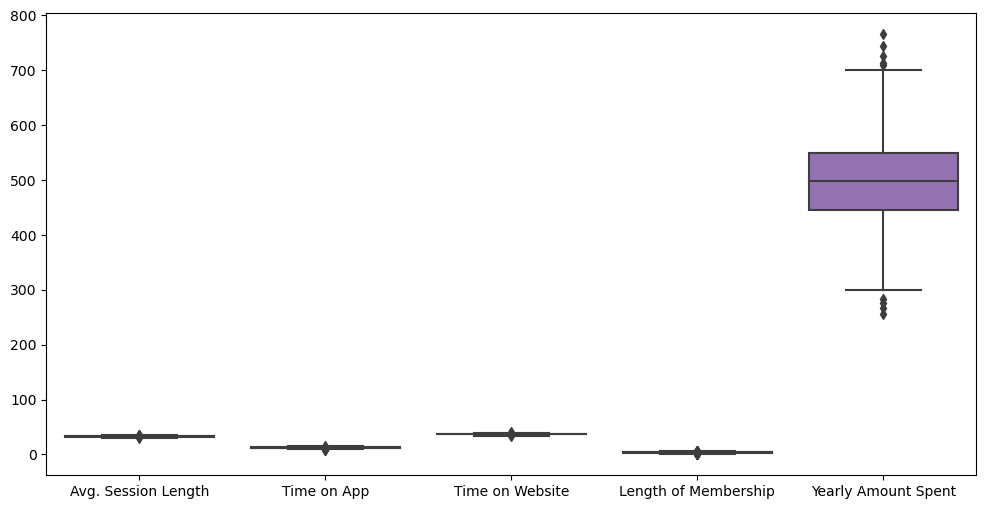

In [24]:
# 칼럼별 boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data = data);

C:\Users\qnwje\AppData\Roaming\Python\Python38\site-packages\seaborn\categorical.py:82: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


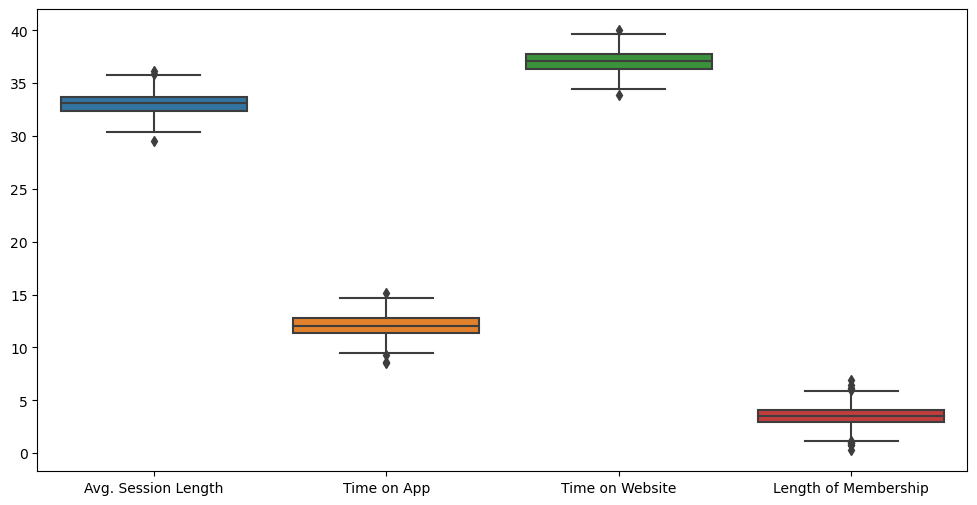

In [25]:
# 특성들의 boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data = data.iloc[:, :-1]);

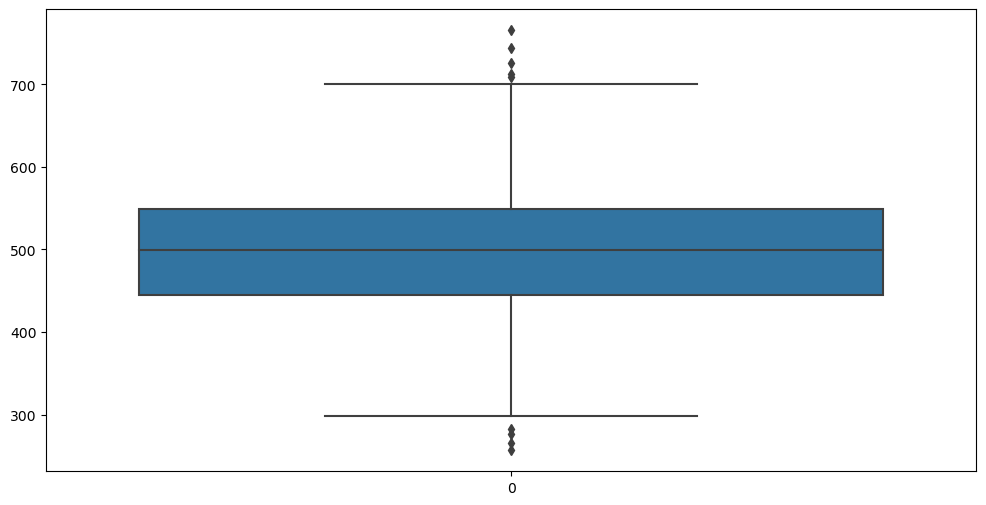

In [26]:
# label값 boxplot
plt.figure(figsize=(12,6))
sns.boxplot(data = data['Yearly Amount Spent']);

<Figure size 1200x600 with 0 Axes>

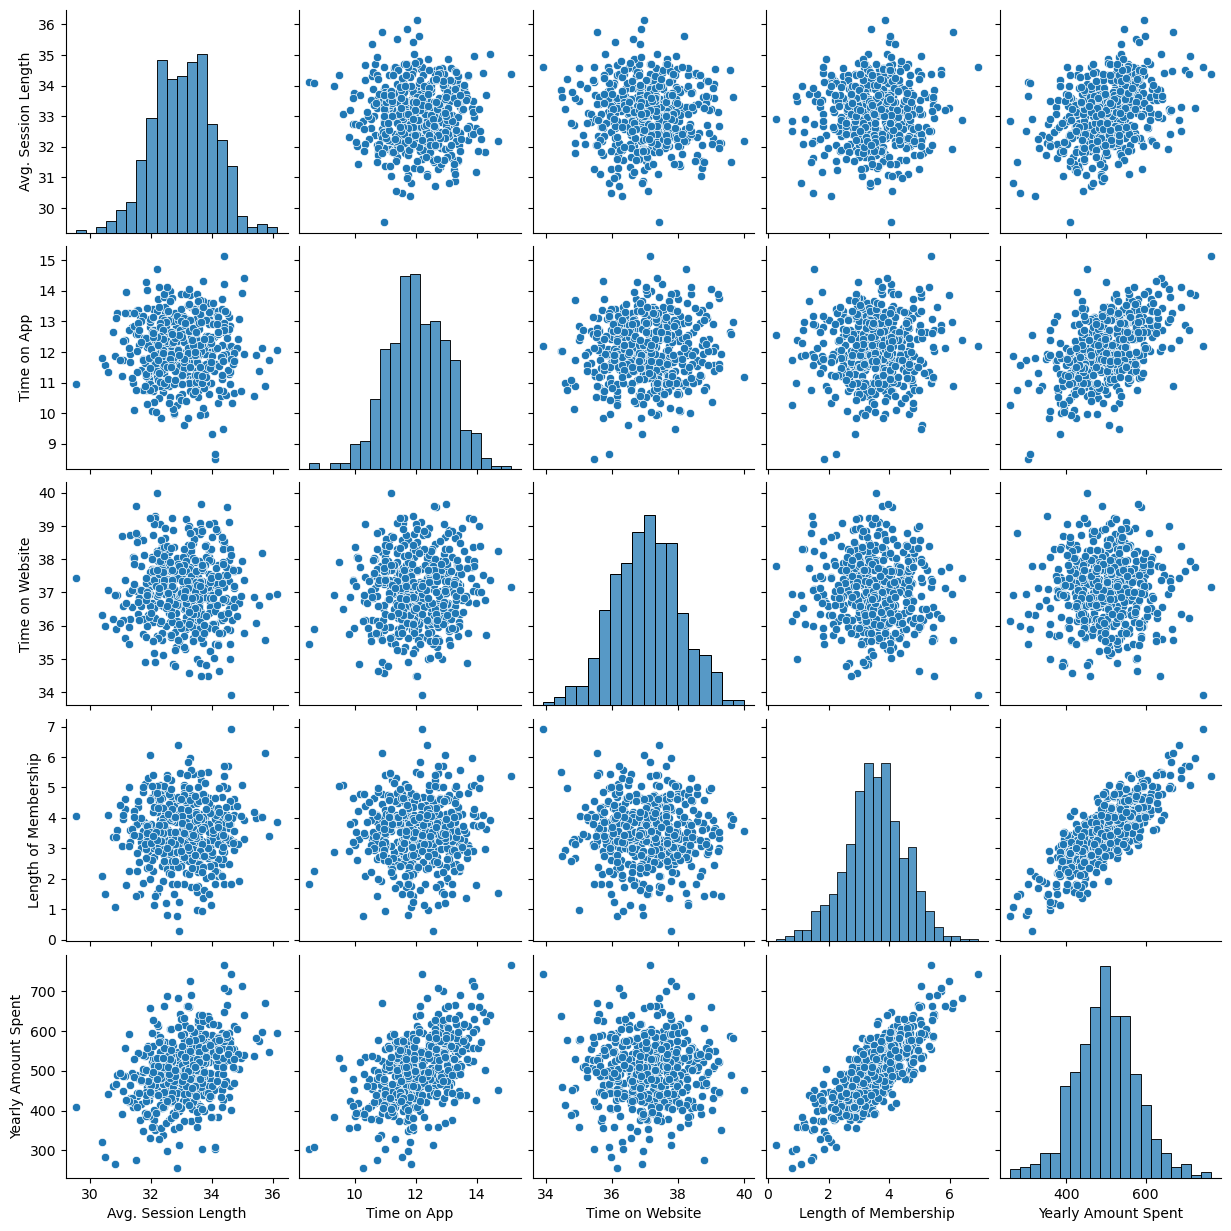

In [27]:
# pairplot으로 경향 확인
plt.figure(figsize=(12,6))
sns.pairplot(data = data);

- 큰 상관관계를 보이는 것은 멤버쉽 유지 기간

<Figure size 1200x600 with 0 Axes>

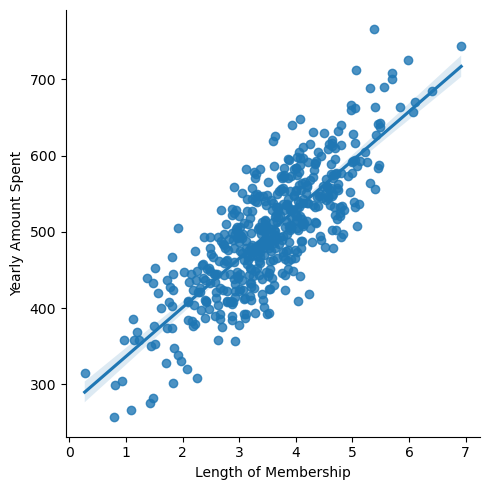

In [28]:
# lmplot으로 확인
plt.figure(figsize=(12,6))
sns.lmplot(x='Length of Membership', y ='Yearly Amount Spent', data= data);

In [29]:
# 상관이 높은 멤버쉽 유지기간만 가지고 통계적 회귀
import statsmodels.api as sm

X = data["Length of Membership"]
y = data['Yearly Amount Spent']
lm = sm.OLS(y, X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.970
Model:                             OLS   Adj. R-squared (uncentered):              0.970
Method:                  Least Squares   F-statistic:                          1.617e+04
Date:                 Sat, 04 Nov 2023   Prob (F-statistic):                        0.00
Time:                         18:51:29   Log-Likelihood:                         -2945.2
No. Observations:                  500   AIC:                                      5892.
Df Residuals:                      499   BIC:                                      5897.
Df Model:                            1                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Length of Membership   135.6117      1.067    127.145      0.000     133.516     137.707
==============================================================================
Omnibus:                        1.408   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.494   Jarque-Bera (JB):                1.472
Skew:                           0.125   Prob(JB):                        0.479
Kurtosis:                       2.909   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- R-squared: 모형의 적합도, y의 분산을 각각의 변수들이 약 99.8%로 설명할 수 있음
- Adj. R-squared: 독립변수가 여러 개인 다중회귀분석에서 사용
- Prob. F-statistic: 회귀모형에 대한 통계적 유의미서 검정 </br>
이 값이 0.05 이하라면 모집단에서도 의미가 있다고 볼 수 있음


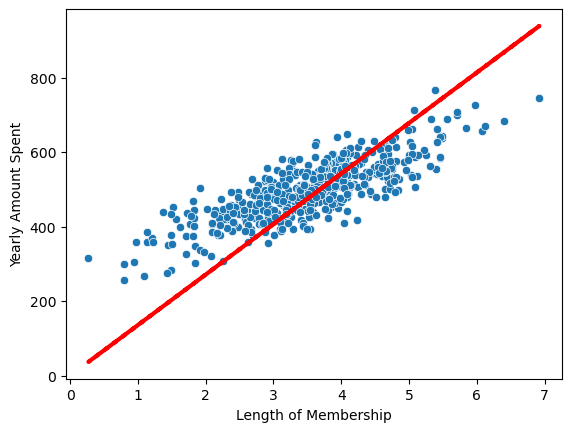

In [32]:
pred = lm.predict(X)

sns.scatterplot(x=X, y=y)
plt.plot(X, pred, 'r', ls='dashed', lw=3)

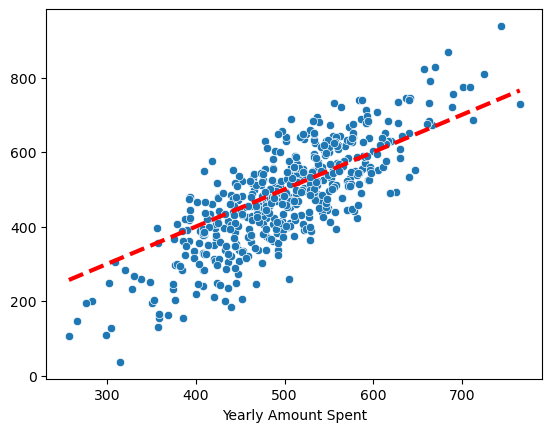

In [34]:
# 참 값 vs 예측 값
sns.scatterplot(x=y, y=pred)
plt.plot([min(y), max(y)],[min(y), max(y)], 'r', ls='dashed', lw=3)

In [36]:
# 상수항 넣기

X = np.c_[X, [1]*len(X)]
X[:5]

array([[4.08262063, 1.        ],
       [2.66403418, 1.        ],
       [4.1045432 , 1.        ],
       [3.12017878, 1.        ],
       [4.44630832, 1.        ]])

In [38]:
lm = sm.OLS(y,X).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Yearly Amount Spent   R-squared:                       0.655
Model:                             OLS   Adj. R-squared:                  0.654
Method:                  Least Squares   F-statistic:                     943.9
Date:                 Sat, 04 Nov 2023   Prob (F-statistic):          4.81e-117
Time:                         19:04:36   Log-Likelihood:                -2629.9
No. Observations:                  500   AIC:                             5264.
Df Residuals:                      498   BIC:                             5272.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            64.2187      2.090     30.723      0.000      60.112      68.326
const        272.3998      7.675     35.492      0.000     257.320     287.479
==============================================================================
Omnibus:                        1.092   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                1.122
Skew:                           0.037   Prob(JB):                        0.571
Kurtosis:                       2.780   Cond. No.                         14.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

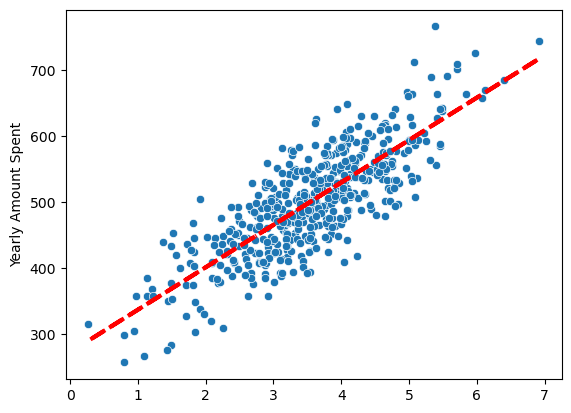

In [39]:
pred = lm.predict(X)

sns.scatterplot(x=X[:,0], y=y)
plt.plot(X[:,0], pred, 'r', ls='dashed', lw=3)

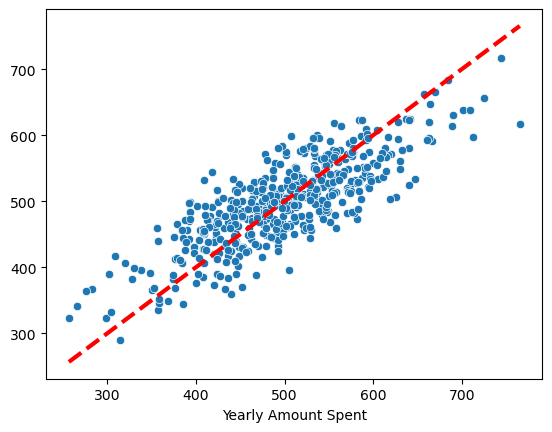

In [40]:
# 참 값 vs 예측 값
sns.scatterplot(x=y, y=pred)
plt.plot([min(y), max(y)],[min(y), max(y)], 'r', ls='dashed', lw=3)

In [42]:
# 모든 변수 적용하기 
from sklearn.model_selection import train_test_split

X = data.drop('Yearly Amount Spent', axis=1)
y = data["Yearly Amount Spent"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 13)

In [44]:
import statsmodels.api as sm

lm = sm.OLS(y_train, X_train).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.998
Model:                             OLS   Adj. R-squared (uncentered):              0.998
Method:                  Least Squares   F-statistic:                          4.179e+04
Date:                 Sat, 04 Nov 2023   Prob (F-statistic):                        0.00
Time:                         19:10:00   Log-Likelihood:                         -1591.7
No. Observations:                  350   AIC:                                      3191.
Df Residuals:                      346   BIC:                                      3207.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Avg. Session Length     11.8431      0.906     13.070      0.000      10.061      13.625
Time on App             35.2169      1.212     29.046      0.000      32.832      37.602
Time on Website        -14.2536      0.840    -16.960      0.000     -15.907     -12.601
Length of Membership    60.1702      1.275     47.183      0.000      57.662      62.678
==============================================================================
Omnibus:                        0.648   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.723   Jarque-Bera (JB):                0.755
Skew:                          -0.042   Prob(JB):                        0.686
Kurtosis:                       2.788   Cond. No.                         55.7
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

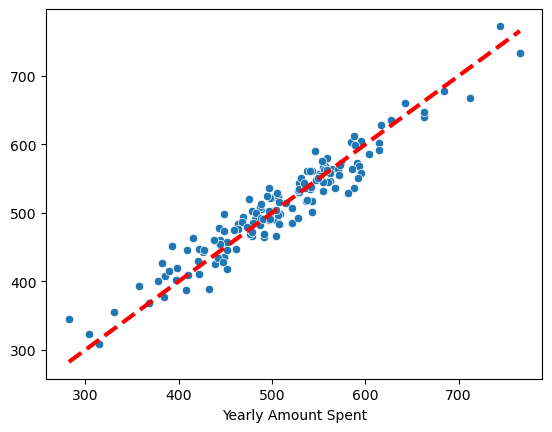

In [45]:
# 참 값 vs 예측 값
pred = lm.predict(X_test)

sns.scatterplot(x=y_test, y=pred)
plt.plot([min(y_test), max(y_test)],[min(y_test), max(y_test)], 'r', ls='dashed', lw=3)

# Cost Function

- 직선으로만 표현한다면 각 점(데이터)와 직선(구하고자 하는 모델)사이의 에러가 제일 작도록 해야한다.
- 복잡한 데이터에서는 cost function의 최솟값을 구하기 힘들다.

## Gradient Descent

- 랜덤하게 임의의 점을 선택하고 미분 값을 계산하여 업데이트
- 목표점의 오른쪽이라면, $a\frac{d}{dt}J_\theta(x) > 0$  
- 목표점이 왼쪽이라면, $a\frac{d}{dt}J_\theta(x) < 0$

- 학습률(Learning Rate)
    - $\theta: = \theta - a\frac{d}{dt}J_\theta(x)$
    
    - $a$는 얼마만큼 $\theta$를 갱신할 것인지를 설정하는 값

- 학습률이 작다면
    - 최솟값을 찾으러 가는 간격이 작게됨
    - 여러번 갱신해야 하나 최솟값에 잘 도달할 수 있음
- 학습률이 크다면
    - 최솟값을 찾으러가는 간격이 크게됨
    - 갱신횟수는 상대적으로 적을 수 있으나, 수렴하지 않고 진동할 수도 있음

## 다변수 데이터에 대한 회귀

In [46]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\qnwje\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California 

- CRIM     :범죄율
- ZN       :25,000 평방피트를 초과 거주지역 비율
- INDUS    :비소매상업지역 면적 비율
- CHAS     :찰스강의 경계에 위치한 경우 1, 아니면 0
- NOX      :일산화질소 농도
- RM       :주택당 방수
- AGE      :1940년 이전에 건축된 주택의 비율
- DIS      :직업센터의 거리
- RAD      :방사형 고속도로까지의 거리
- TAX      :재산세율
- PTRATIO  :학생/교사 비율
- B        :인구 중 흑인 비율
- LSTAT    :인구 중 하위 계측 비율
- MEDV     :Median value of owner-occupied homes in $1000's

In [47]:
import pandas as pd
boston_pd = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_pd["PRICE"] = boston.target

boston_pd.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [49]:
import plotly.express as px

fig = px.histogram(boston_pd, x= 'PRICE')
fig.show()

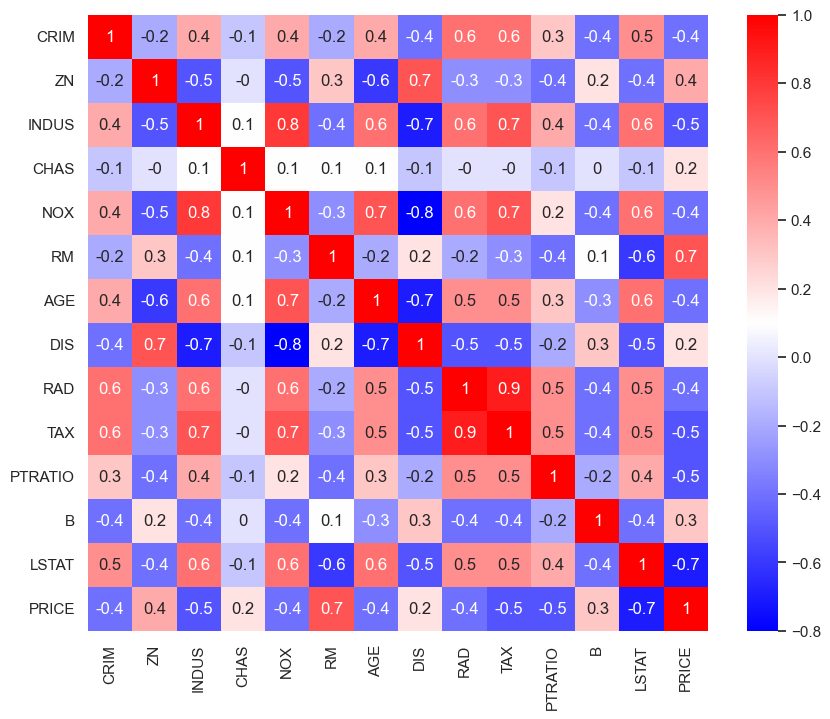

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

corr_mat = boston_pd.corr().round(1)
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data = corr_mat, annot=True, cmap='bwr');

- Price와 방의수(RM), 저소득충 인구(LSTAT)와 높은 상관관계가 보임

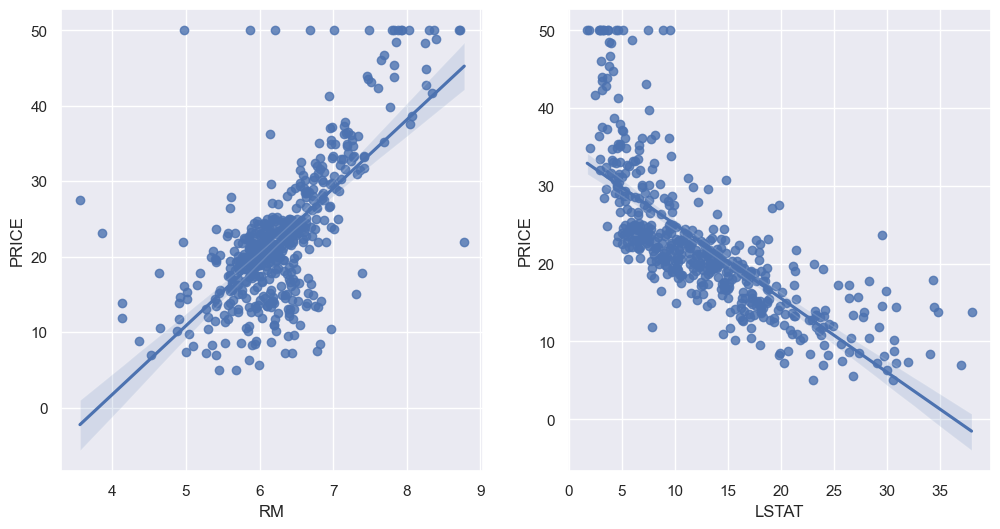

In [52]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(12,6)})
fig, ax = plt.subplots(ncols=2)
sns.regplot(x = 'RM', y= 'PRICE', data= boston_pd, ax = ax[0])
sns.regplot(x = 'LSTAT', y= 'PRICE', data= boston_pd, ax = ax[1]);

In [53]:
from sklearn.model_selection import train_test_split

X = boston_pd.drop('PRICE', axis=1)
y = boston_pd["PRICE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 13)

In [54]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [55]:
import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)

RMSE of Train Data :  4.679350134061537
RMSE of Test Data :  4.852315540024


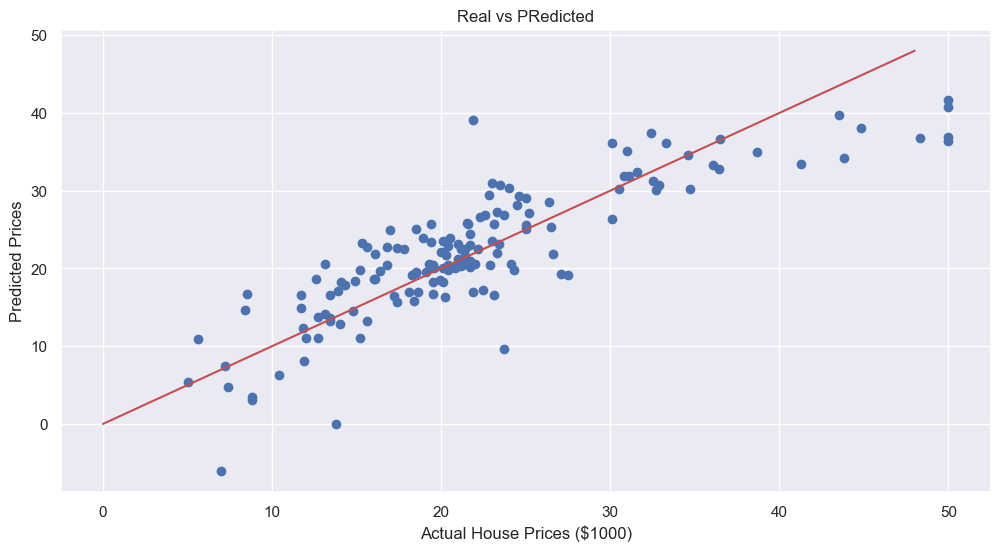

In [56]:
# 성능확인

plt.scatter(y_test, pred_test)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted Prices")
plt.title("Real vs PRedicted")
plt.plot([0,48],[0,48], 'r')
plt.show()

In [57]:
# LSTAT를 사용하는 것이 맞는 걸까?
X = boston_pd.drop(['PRICE', 'LSTAT'], axis=1)
y = boston_pd["PRICE"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 13)

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [58]:
pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)
rmse_tr = (np.sqrt(mean_squared_error(y_train, pred_tr)))
rmse_test = (np.sqrt(mean_squared_error(y_test, pred_test)))

print('RMSE of Train Data : ', rmse_tr)
print('RMSE of Test Data : ', rmse_test)
# 성능은 당연히 나빠진다.

RMSE of Train Data :  5.271864408436761
RMSE of Test Data :  5.022075568728305


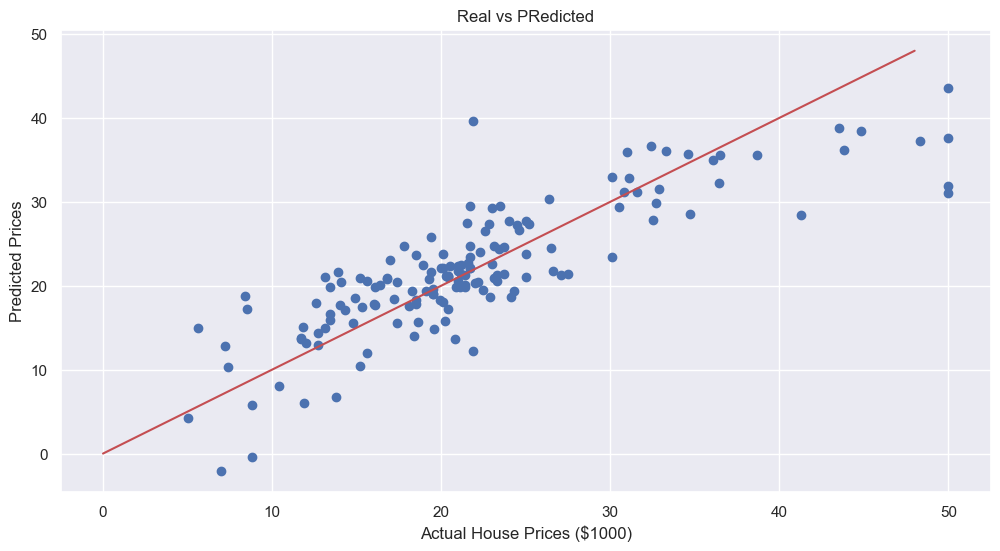

In [59]:
plt.scatter(y_test, pred_test)
plt.xlabel("Actual House Prices ($1000)")
plt.ylabel("Predicted Prices")
plt.title("Real vs PRedicted")
plt.plot([0,48],[0,48], 'r')
plt.show()